In [1]:
import rasterio
from pathlib import Path

def check_pixel_size_tif(raster_path):
    with rasterio.open(raster_path) as src:
        pixel_width, pixel_height = src.res
        crs = src.crs

        print(f"File: {raster_path}")
        print(f"CRS: {crs}")
        print(f"Pixel size (width): {pixel_width:.8f} {'m' if crs and crs.is_projected else 'degrees'}")
        print(f"Pixel size (height): {pixel_height:.8f} {'m' if crs and crs.is_projected else 'degrees'}")

# Example usage
dem_file = Path(r"C:\Users\Ankit\OneDrive\Desktop\Datasets_Forest_fire\P5_PAN_CD_N29_000_E078_000_30m\P5_PAN_CD_N29_000_E078_000_30m\P5_PAN_CD_N29_000_E078_000_DEM_30m.tif")  
check_pixel_size_tif(dem_file)


File: C:\Users\Ankit\OneDrive\Desktop\Datasets_Forest_fire\P5_PAN_CD_N29_000_E078_000_30m\P5_PAN_CD_N29_000_E078_000_30m\P5_PAN_CD_N29_000_E078_000_DEM_30m.tif
CRS: EPSG:4326
Pixel size (width): 0.00027778 degrees
Pixel size (height): 0.00027778 degrees


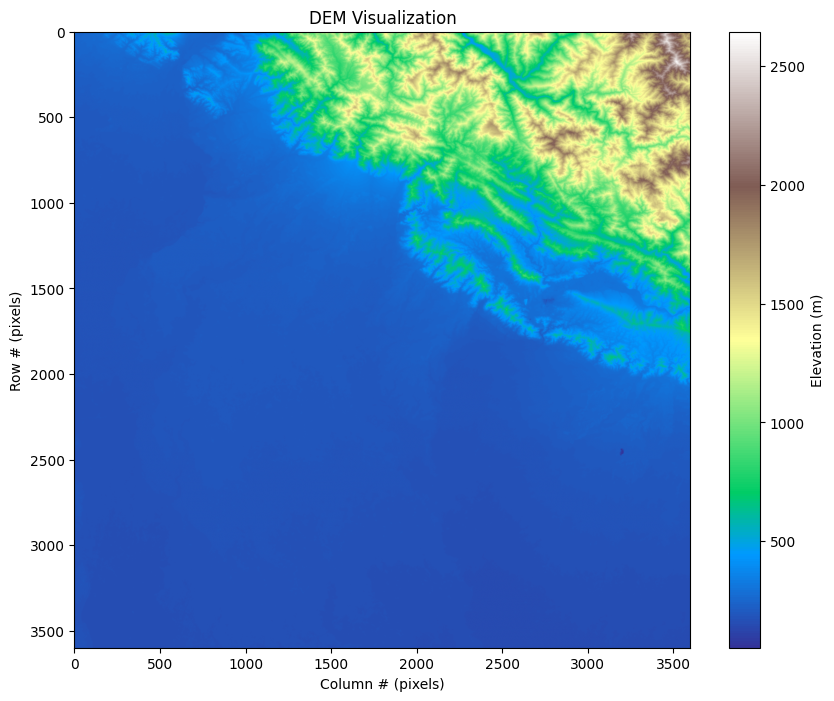

CRS: EPSG:4326
Bounds: BoundingBox(left=77.9999998191, bottom=29.0000075867, right=79.00000061909999, top=30.0000083867)


In [2]:
import rasterio
import matplotlib.pyplot as plt

# Path to your DEM file
dem_path = r"C:\Users\Ankit\OneDrive\Desktop\Datasets_Forest_fire\P5_PAN_CD_N29_000_E078_000_30m\P5_PAN_CD_N29_000_E078_000_30m\P5_PAN_CD_N29_000_E078_000_DEM_30m.tif"

# Open the DEM
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)  # read the first (and usually only) band
    dem_crs = src.crs
    dem_bounds = src.bounds

# Plot the DEM
plt.figure(figsize=(10, 8))
plt.imshow(dem_data, cmap='terrain')
plt.colorbar(label="Elevation (m)")
plt.title("DEM Visualization")
plt.xlabel("Column # (pixels)")
plt.ylabel("Row # (pixels)")
plt.show()

print(f"CRS: {dem_crs}")
print(f"Bounds: {dem_bounds}")


In [13]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np

In [14]:
dem_path = r"C:\Users\Ankit\Datasets_Forest_fire\merged_DEM_30m_32644.tif"
ref_path = r"C:\Users\Ankit\Datasets_Forest_fire\VIIRS_fire_time_stack.tif"
out_path = r"C:\Users\Ankit\Datasets_Forest_fire\DEM_resampled_to_VIIRS1.tif"

In [15]:
# --- Step 1: Assign CRS if missing ---
with rasterio.open(viirs_path, "r+") as ref:
    if ref.crs is None:
        ref.crs = "EPSG:4326"

In [16]:
# --- Step 2: Open VIIRS reference ---
with rasterio.open(viirs_path) as ref:
    ref_transform = ref.transform
    ref_crs = ref.crs
    ref_height, ref_width = ref.height, ref.width
    ref_profile = ref.profile.copy()

# --- Step 3: Open DEM and resample ---
with rasterio.open(dem_path) as dem:
    dem_data = dem.read(1)
    resampled = np.empty((ref_height, ref_width), dtype="float32")

    reproject(
        source=dem_data,
        destination=resampled,
        src_transform=dem.transform,
        src_crs=dem.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.bilinear
    )

# --- Step 4: Save resampled DEM ---
out_profile = ref_profile
out_profile.update({
    "dtype": "float32",
    "count": 1,
    "crs": ref_crs,
    "compress": "lzw"
})

with rasterio.open(out_path, "w", **out_profile) as dst:
    dst.write(resampled, 1)

In [17]:
import rasterio
import numpy as np

out_path = r"C:\Users\Ankit\Datasets_Forest_fire\DEM_resampled_to_VIIRS1.tif"

with rasterio.open(out_path) as src:
    print("Saved raster size:", (src.height, src.width))
    print("Bands:", src.count)
    print("CRS:", src.crs)
    arr = src.read(1)
    print("Unique values:", np.unique(arr)[:20])  # first 20 unique vals


Saved raster size: (13, 17)
Bands: 1
CRS: EPSG:4326
Unique values: [-13320.596   -13153.267   -12703.129   -12373.756   -12155.419
 -11560.102   -10800.683    -9981.703    -9054.308    -8182.504
  -6968.893    -5550.187    -3919.2488      96.24028    103.67307
    104.66388    115.93255    115.96863    117.528      118.8244 ]
